In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00
time: 276 µs (started: 2024-01-15 23:12:08 +00:00)


In [3]:
import glob, os
import random
import shutil
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
path="drive/MyDrive/imagensOriginais/"
imagens_originais= glob.glob(os.path.join(path, '*.jpg'))

time: 4.4 s (started: 2024-01-15 23:12:10 +00:00)


In [4]:
def dataset(file_list,size=(224,224)):
	imagens = []
	for i, file in enumerate(imagens_originais):
		imagem = io.imread(file)
		imagem = transform.resize(imagem, size, mode='constant')
		imagens.append(imagem)

	labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]

	return np.array(imagens), np.array(labels)

time: 644 µs (started: 2024-01-15 23:12:14 +00:00)


In [5]:
imagens,labels=dataset(imagens_originais)

time: 35.6 s (started: 2024-01-15 23:12:14 +00:00)


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(imagens, labels, test_size = 0.20, random_state = 40)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = 0.15, random_state = 40)

time: 512 ms (started: 2024-01-15 23:12:50 +00:00)


In [7]:
EPOCHS = 60
BATCH_SIZE = 16

time: 495 µs (started: 2024-01-15 23:12:51 +00:00)


In [8]:
train_generator = ImageDataGenerator(
                                      shear_range=30,
                                      rotation_range=20,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                  ).flow(X_train, Y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator(
                                      shear_range=30,
                                      rotation_range=20,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                  ).flow(X_validation, Y_validation, batch_size=BATCH_SIZE)

time: 167 ms (started: 2024-01-15 23:12:51 +00:00)


In [9]:
def create_model():
  model = models.Sequential()
  model.add(layers.Conv2D(64,(3,3), padding="same",strides=1, activation='relu', input_shape=(224,224,3)))  #input shape must be the match the input image tensor shape
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(64,(3,3), padding="same",strides=1, activation='relu'))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(128,(3,3), padding="same",strides=1, activation='relu'))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(256,(3,3), padding="same",strides=1, activation='relu'))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(512, activation = 'relu'))
  model.add(layers.Dense(1, activation = 'sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-3), metrics=['acc'])

  return model

time: 1.14 ms (started: 2024-01-15 23:12:51 +00:00)


In [10]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "Generico/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

time: 412 µs (started: 2024-01-15 23:12:51 +00:00)


In [11]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq="epoch")

time: 582 µs (started: 2024-01-15 23:12:51 +00:00)


In [12]:
model = create_model()
# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

time: 1.32 s (started: 2024-01-15 23:12:52 +00:00)


In [13]:
steps_per_epoch = X_train.shape[0]//BATCH_SIZE
validation_steps = X_validation.shape[0]//BATCH_SIZE

time: 452 µs (started: 2024-01-15 23:12:55 +00:00)


In [14]:
history = model.fit(train_generator,
                   steps_per_epoch=steps_per_epoch,
                   epochs=EPOCHS,
                   callbacks=[cp_callback],
                   validation_data=validation_generator,
                   validation_steps=validation_steps,
                   shuffle=True,
                   verbose=2)

Epoch 1/60

Epoch 1: saving model to Generico/cp-0001.ckpt
30/30 - 16s - loss: 0.7144 - acc: 0.4861 - val_loss: 0.6954 - val_acc: 0.4750 - 16s/epoch - 522ms/step
Epoch 2/60

Epoch 2: saving model to Generico/cp-0002.ckpt
30/30 - 13s - loss: 0.6950 - acc: 0.5267 - val_loss: 0.6910 - val_acc: 0.5500 - 13s/epoch - 449ms/step
Epoch 3/60

Epoch 3: saving model to Generico/cp-0003.ckpt
30/30 - 8s - loss: 0.6945 - acc: 0.4883 - val_loss: 0.6925 - val_acc: 0.5000 - 8s/epoch - 271ms/step
Epoch 4/60

Epoch 4: saving model to Generico/cp-0004.ckpt
30/30 - 9s - loss: 0.6935 - acc: 0.5373 - val_loss: 0.6869 - val_acc: 0.6250 - 9s/epoch - 285ms/step
Epoch 5/60

Epoch 5: saving model to Generico/cp-0005.ckpt
30/30 - 6s - loss: 0.7296 - acc: 0.6311 - val_loss: 0.6028 - val_acc: 0.7500 - 6s/epoch - 216ms/step
Epoch 6/60

Epoch 6: saving model to Generico/cp-0006.ckpt
30/30 - 7s - loss: 0.5961 - acc: 0.7271 - val_loss: 0.5171 - val_acc: 0.7625 - 7s/epoch - 230ms/step
Epoch 7/60

Epoch 7: saving model to

In [15]:
# Especificar o diretório de destino no Google Drive
drive_dir = '/content/drive/MyDrive/Generico/'

time: 502 µs (started: 2024-01-15 23:21:51 +00:00)


In [16]:
shutil.copytree(checkpoint_dir, drive_dir)

'/content/drive/MyDrive/Generico/'

time: 2min 40s (started: 2024-01-15 23:21:51 +00:00)


In [17]:
def smooth_curve(points, factor=0.8): #this function will make our plots more smooth
	smoothed_points = []
	for point in points:
		if smoothed_points:
			previous = smoothed_points[-1]
			smoothed_points.append(previous*factor+point*(1-factor))
		else:
			smoothed_points.append(point)
	return smoothed_points

time: 1.74 ms (started: 2024-01-15 23:24:31 +00:00)


In [18]:
def imprime_graficos(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc)+1)
  plt.plot(epochs, smooth_curve(acc), 'bo', label='Treinamento acc')
  plt.plot(epochs, smooth_curve(val_acc), 'r-', label='Validação acc')
  plt.legend()
  plt.title('Treinamento and Validação Acc')
  plt.figure()

  plt.plot(epochs, smooth_curve(loss), 'bo', label='Treinamento loss')
  plt.plot(epochs, smooth_curve(val_loss), 'r-', label='Validação loss')
  plt.legend()
  plt.title('Treinamento e Validação Loss')
  plt.show()

  print("\n")

time: 980 µs (started: 2024-01-15 23:24:31 +00:00)


In [19]:
def metricas(modelo_metricas, epocas):

  # Obter as previsões do modelo nos dados de teste
  y_pred = modelo_metricas.predict(X_test)

  # Converter as previsões em rótulos binários
  y_pred_binary = (y_pred > 0.5).astype(int)

  # Calcular as métricas de precisão, recall e F1 Score
  classification_rep = classification_report(Y_test, y_pred_binary)
  print("Classification Report:\n", classification_rep)


  #Calcula a matriz de confusão
  cm = confusion_matrix(Y_test, y_pred_binary)
  # Display
  plt.figure(figsize=(4, 4))

  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=False)
  plt.xticks(ticks=[0.5, 1.5], labels=["No Pollen", "Pollen"])
  plt.yticks(ticks=[0.5, 1.5], labels=["No Pollen", "Pollen"])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix " + str(epocas) + " épocas")

  plt.show()

  print("\n")

time: 1.23 ms (started: 2024-01-15 23:24:32 +00:00)


In [20]:
#shutil.rmtree(checkpoint_dir, ignore_errors=False, onerror=None)

time: 275 µs (started: 2024-01-15 23:24:32 +00:00)


Avaliando modelo com checkpoint Generico/cp-0010.ckpt correspondente a época 10
5/5 [==============================] - 3s 151ms/step - loss: 0.2033 - acc: 0.9091
Restored model, accuracy: 0.9090909361839294
Restored model, loss: 0.2032555490732193

5/5 [==============================] - 0s 20ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88        58
           1       0.91      0.94      0.92        85

    accuracy                           0.91       143
   macro avg       0.91      0.90      0.90       143
weighted avg       0.91      0.91      0.91       143



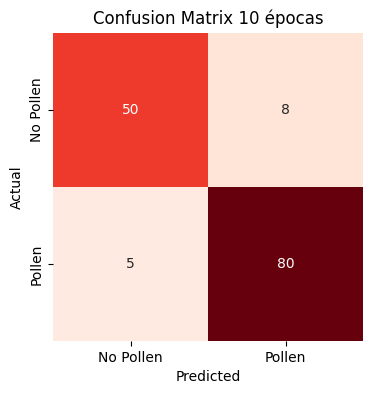



Avaliando modelo com checkpoint Generico/cp-0020.ckpt correspondente a época 20
5/5 [==============================] - 0s 28ms/step - loss: 0.1005 - acc: 0.9580
Restored model, accuracy: 0.9580419659614563
Restored model, loss: 0.10054318606853485

5/5 [==============================] - 0s 27ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.99      0.94      0.96        85

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



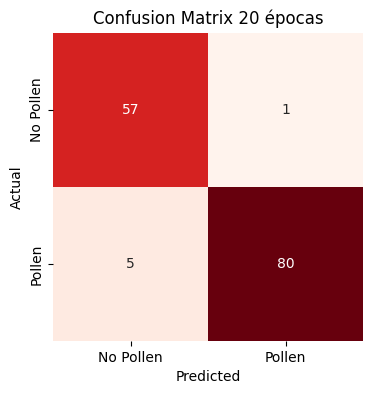



Avaliando modelo com checkpoint Generico/cp-0030.ckpt correspondente a época 30
5/5 [==============================] - 0s 28ms/step - loss: 0.0873 - acc: 0.9580
Restored model, accuracy: 0.9580419659614563
Restored model, loss: 0.08725447207689285

5/5 [==============================] - 0s 27ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.98      0.95      0.96        85

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



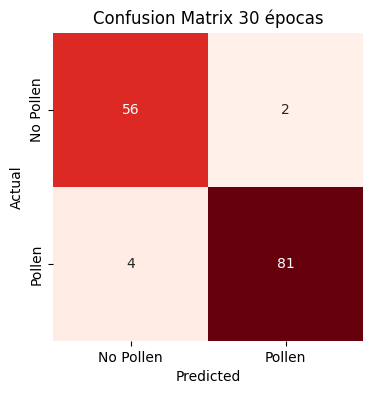



Avaliando modelo com checkpoint Generico/cp-0040.ckpt correspondente a época 40
5/5 [==============================] - 1s 31ms/step - loss: 0.0550 - acc: 0.9650
Restored model, accuracy: 0.9650349617004395
Restored model, loss: 0.05504791438579559

5/5 [==============================] - 0s 30ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.95      0.99      0.97        85

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



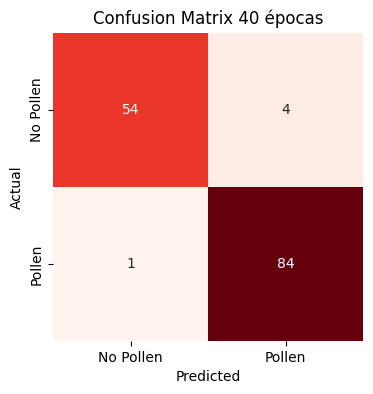



Avaliando modelo com checkpoint Generico/cp-0050.ckpt correspondente a época 50
5/5 [==============================] - 0s 29ms/step - loss: 0.0345 - acc: 0.9790
Restored model, accuracy: 0.9790209531784058
Restored model, loss: 0.03454940393567085

5/5 [==============================] - 0s 24ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        58
           1       0.99      0.98      0.98        85

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



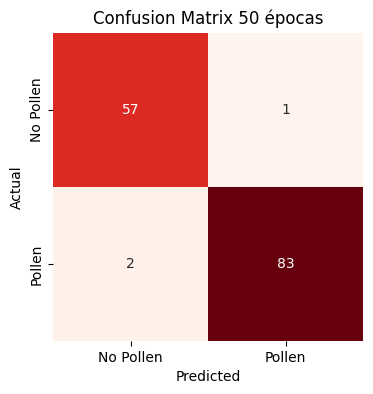



Avaliando modelo com checkpoint Generico/cp-0060.ckpt correspondente a época 60
5/5 [==============================] - 0s 33ms/step - loss: 0.0407 - acc: 0.9860
Restored model, accuracy: 0.9860140085220337
Restored model, loss: 0.04067306965589523

5/5 [==============================] - 0s 28ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.98      0.99        85

    accuracy                           0.99       143
   macro avg       0.98      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



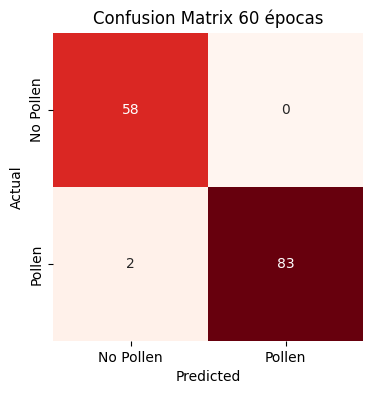



time: 22.5 s (started: 2024-01-15 23:25:35 +00:00)


In [23]:
epoca = 10
for i in range(6):
  cp = "Generico/cp-00"+str(epoca)+".ckpt"
  print("Avaliando modelo com checkpoint " + cp + " correspondente a época " + str(epoca))
  avaliacao_modelo = create_model()
  # Load the previously saved weights
  avaliacao_modelo.load_weights(cp)

  # Re-evaluate the model
  loss, acc = avaliacao_modelo.evaluate(X_test, Y_test)
  print("Restored model, accuracy: " + str(acc) )
  print("Restored model, loss: " + str(loss) + "\n")

  metricas(avaliacao_modelo, epoca)

  epoca += 10

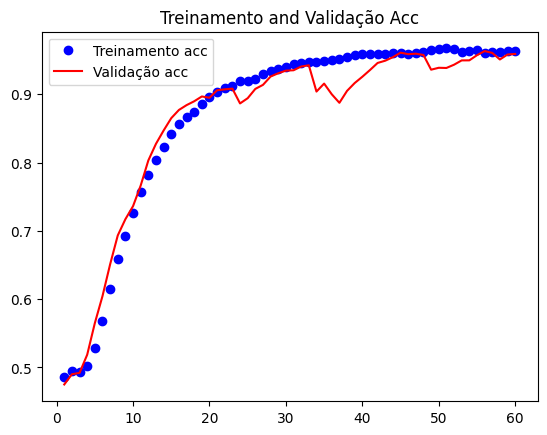

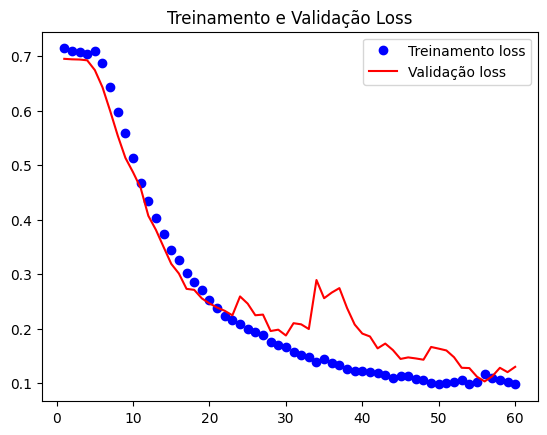



time: 439 ms (started: 2024-01-15 23:25:58 +00:00)


In [24]:
imprime_graficos(history)